In [183]:
%pip install joblib

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning:

This process (pid=71835) is multi-threaded, use of forkpty() may lead to deadlocks in the child.



Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
import skforecast

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pmdarima.arima import auto_arima #SARIMAX using pmdarima
from skforecast.ForecasterSarimax import ForecasterSarimax

SARIMAX for Luzon

In [3]:
labels_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/train_labels_transformed.csv'
data_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/train_data_transformed.csv'
test_data_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_data.csv'
test_labels_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_labels.csv'
transformed_test_exog=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_data_transformed.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_test_exog = pd.read_csv(transformed_test_exog)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_data_transformed.csv'

In [23]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)

print(train_date)
print(test_date)


          Date
0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
..         ...
579 2023-08-03
580 2023-08-04
581 2023-08-05
582 2023-08-06
583 2023-08-07

[584 rows x 1 columns]
          Date
0   2023-08-08
1   2023-08-09
2   2023-08-10
3   2023-08-11
4   2023-08-12
..         ...
141 2023-12-27
142 2023-12-28
143 2023-12-29
144 2023-12-30
145 2023-12-31

[146 rows x 1 columns]


In [41]:
#Preparing the dataframes
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)

transformed_train_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Cubi Point','9':'TMAX_Cubi Point','10':'TMIN_Cubi Point','11':'RAINFALL_NAIA','12':'TMAX_NAIA','13':'TMIN_NAIA','14':'RAINFALL_Science Garden','15':'TMAX_Science Garden','16':'TMIN_Science Garden','17':'RAINFALL_San Jose','18':'TMAX_San Jose','19':'TMIN_San Jose','20':'RAINFALL_Tayabas','21':'TMAX_Tayabas','22':'TMIN_Tayabas','23':'RAINFALL_CLSU','24':'TMAX_CLSU','25':'TMIN_CLSU','26':'RAINFALL_Tanay','27':'TMAX_Tanay','28':'TMIN_Tanay','29':'RAINFALL_Ambulong','30':'TMAX_Ambulong','31':'TMIN_Ambulong','32':'RAINFALL_Casiguran','33':'TMAX_Casiguran','34':'TMIN_Casiguran','35':'RAINFALL_Clark','36':'TMAX_Clark','37':'TMIN_Clark','38':'RAINFALL_Calapan','39':'TMAX_Calapan','40':'TMIN_Calapan'}, inplace=True)
LUZ_data_columns = ['GWAP', 'LWAP', 'FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Cubi Point','TMAX_Cubi Point','TMIN_Cubi Point','RAINFALL_NAIA','TMAX_NAIA','TMIN_NAIA','RAINFALL_Science Garden','TMAX_Science Garden','TMIN_Science Garden','RAINFALL_San Jose','TMAX_San Jose','TMIN_San Jose','RAINFALL_Tayabas','TMAX_Tayabas','TMIN_Tayabas','RAINFALL_CLSU','TMAX_CLSU','TMIN_CLSU','RAINFALL_Tanay','TMAX_Tanay','TMIN_Tanay','RAINFALL_Ambulong','TMAX_Ambulong','TMIN_Ambulong','RAINFALL_Casiguran','TMAX_Casiguran','TMIN_Casiguran','RAINFALL_Clark','TMAX_Clark','TMIN_Clark','RAINFALL_Calapan','TMAX_Calapan','TMIN_Calapan']
LUZ_data_train = pd.DataFrame(transformed_train_data, columns = LUZ_data_columns)
LUZ_data_test = pd.DataFrame(test_data, columns = LUZ_data_columns)


In [42]:
print(labels_test)

            GWAP          LWAP
0    7953.672194   8484.446021
1    7116.523973   7590.762852
2    9804.539158  10617.636920
3    8101.978364   8544.909795
4    6522.459813   6871.504444
..           ...           ...
141  3991.018676   4136.799477
142  3688.349524   3812.075824
143  3674.409234   3804.008781
144  3304.265247   3403.759761
145  3491.397388   3592.529767

[146 rows x 2 columns]


In [43]:
print(LUZ_data_test)

            GWAP          LWAP  FLOW_LUZ  RESERVE_GWAP_Fr  RESERVE_GWAP_Ru  \
0    7953.672194   8484.446021   -634.11      1487.960668      3181.738826   
1    7116.523973   7590.762852  -3076.80      1756.467906      2290.057382   
2    9804.539158  10617.636920 -30344.56      2955.255204      5026.898520   
3    8101.978364   8544.909795 -29323.08      2444.164721      3005.440897   
4    6522.459813   6871.504444 -46005.71      1883.738436      1842.556046   
..           ...           ...       ...              ...              ...   
141  3991.018676   4136.799477 -24416.54      3698.677664      6068.115985   
142  3688.349524   3812.075824 -18873.45      3268.687856      6649.677833   
143  3674.409234   3804.008781   5849.07        75.866019      7602.698723   
144  3304.265247   3403.759761  13005.47        52.908627        87.260609   
145  3491.397388   3592.529767 -12328.64         6.778533       640.291309   

     RESERVE_GWAP_Rd  RESERVE_GWAP_Dr  Hourly Demand  RAINFALL_

In [33]:
print(labels_train)

         GWAP      LWAP
0    0.278764  0.258105
1    0.337307  0.314556
2    0.443016  0.418724
3    0.525069  0.501099
4    0.808333  0.787813
..        ...       ...
579  0.331255  0.317026
580  0.447944  0.432209
581  0.427384  0.410919
582  0.431395  0.415499
583  0.445290  0.426566

[584 rows x 2 columns]


In [53]:
#Preparing GWAP datasets
LUZ_GWAP_train = labels_train['GWAP']
LUZ_GWAP_train = pd.concat([train_date,LUZ_GWAP_train], axis=1)
LUZ_GWAP_train.set_index('Date', inplace=True)
LUZ_GWAP_train.index = pd.to_datetime(LUZ_GWAP_train.index)
LUZ_GWAP_train.index.freq='D'
LUZ_GWAP_train = LUZ_GWAP_train.squeeze()


LUZ_GWAP_test = labels_test['GWAP']
LUZ_GWAP_test = pd.concat([test_date,LUZ_GWAP_test], axis=1)
LUZ_GWAP_test.set_index('Date', inplace=True)
LUZ_GWAP_test.index = pd.to_datetime(LUZ_GWAP_test.index)
LUZ_GWAP_test.index.freq='D'
LUZ_GWAP_test = LUZ_GWAP_test.squeeze()

LUZ_GWAP = pd.concat([LUZ_GWAP_train, LUZ_GWAP_test], ignore_index=False)


#Preparing the LWAP datasets
LUZ_LWAP_train = labels_train['LWAP']
LUZ_LWAP_train = pd.concat([train_date,LUZ_LWAP_train], axis=1)
LUZ_LWAP_train.set_index('Date', inplace=True)
LUZ_LWAP_train.index = pd.to_datetime(LUZ_LWAP_train.index)
LUZ_LWAP_train.index.freq='D'
LUZ_LWAP_train = LUZ_LWAP_train.squeeze()


LUZ_LWAP_test = labels_test['LWAP']
LUZ_LWAP_test = pd.concat([test_date,LUZ_LWAP_test], axis=1)
LUZ_LWAP_test.set_index('Date', inplace=True)
LUZ_LWAP_test.index = pd.to_datetime(LUZ_LWAP_test.index)
LUZ_LWAP_test.index.freq='D'
LUZ_LWAP_test = LUZ_LWAP_test.squeeze()

#Preparing the exogenous datasets
LUZ_exog_train = LUZ_data_train[['FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Cubi Point','TMAX_Cubi Point','TMIN_Cubi Point','RAINFALL_NAIA','TMAX_NAIA','TMIN_NAIA','RAINFALL_Science Garden','TMAX_Science Garden','TMIN_Science Garden','RAINFALL_San Jose','TMAX_San Jose','TMIN_San Jose','RAINFALL_Tayabas','TMAX_Tayabas','TMIN_Tayabas','RAINFALL_CLSU','TMAX_CLSU','TMIN_CLSU','RAINFALL_Tanay','TMAX_Tanay','TMIN_Tanay','RAINFALL_Ambulong','TMAX_Ambulong','TMIN_Ambulong','RAINFALL_Casiguran','TMAX_Casiguran','TMIN_Casiguran','RAINFALL_Clark','TMAX_Clark','TMIN_Clark','RAINFALL_Calapan','TMAX_Calapan','TMIN_Calapan']]
LUZ_exog_train = pd.concat([train_date,LUZ_exog_train], axis=1)
LUZ_exog_train.set_index('Date', inplace=True)

LUZ_exog_test = LUZ_data_test[['FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Cubi Point','TMAX_Cubi Point','TMIN_Cubi Point','RAINFALL_NAIA','TMAX_NAIA','TMIN_NAIA','RAINFALL_Science Garden','TMAX_Science Garden','TMIN_Science Garden','RAINFALL_San Jose','TMAX_San Jose','TMIN_San Jose','RAINFALL_Tayabas','TMAX_Tayabas','TMIN_Tayabas','RAINFALL_CLSU','TMAX_CLSU','TMIN_CLSU','RAINFALL_Tanay','TMAX_Tanay','TMIN_Tanay','RAINFALL_Ambulong','TMAX_Ambulong','TMIN_Ambulong','RAINFALL_Casiguran','TMAX_Casiguran','TMIN_Casiguran','RAINFALL_Clark','TMAX_Clark','TMIN_Clark','RAINFALL_Calapan','TMAX_Calapan','TMIN_Calapan']]
LUZ_exog_test = pd.concat([test_date,LUZ_exog_test], axis=1)
LUZ_exog_test.set_index('Date', inplace=True)


In [54]:
#Plotting Train LWAP ang GWAP
# Create the line plot
luz_gwap_plot = px.line(LUZ_GWAP_train, x=LUZ_GWAP_train.index, y='GWAP')
luz_lwap_plot = px.line(LUZ_LWAP_train, x=LUZ_LWAP_train.index, y='LWAP')
# Set the title using the ticker value
luz_gwap_plot.update_layout(title=f"Luzon GWAP")
luz_lwap_plot.update_layout(title=f"Luzon LWAP")
# Display the plot
luz_gwap_plot.show()
luz_lwap_plot.show()

In [46]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [55]:
#Checking for stationarity in GWAP data
perform_differencing(LUZ_GWAP_train)
perform_differencing(LUZ_LWAP_train)

LUZ_diff_exog = perform_df_differencing(LUZ_exog_train)
LUZ_diff_exog = LUZ_diff_exog.fillna(0)


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value return

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.
Column 'Hourly Demand' is stationary after differencing 1 times.
Column 'RAINFALL_Cubi Point' is stationary after differencing 0 times.
Column 'TMAX_Cubi Point' is stationary after differencing 1 times.
Column 'TMIN_Cubi Point' is stationary after differencing 1 times.
Column 'RAINFALL_NAIA' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'TMAX_NAIA' is stationary after differencing 0 times.
Column 'TMIN_NAIA' is stationary after differencing 1 times.
Column 'RAINFALL_Science Garden' is stationary after differencing 1 times.
Column 'TMAX_Science Garden' is stationary after differencing 0 times.
Column 'TMIN_Science Garden' is stationary after differencing 0 times.
Column 'RAINFALL_San Jose' is stationary after differencing 0 times.
Column 'TMAX_San Jose' is stationary after differencing 1 times.
Column 'TMIN_San Jose' is stationary after differencing 0 times.
Column 'RAINFALL_Tayabas' is stationary after differencing 0 times.
Column 'TMAX_Tayabas' is stationary after differencing 0 times.
Column 'TMIN_Tayabas' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'RAINFALL_CLSU' is stationary after differencing 1 times.
Column 'TMAX_CLSU' is stationary after differencing 1 times.
Column 'TMIN_CLSU' is stationary after differencing 1 times.
Column 'RAINFALL_Tanay' is stationary after differencing 1 times.
Column 'TMAX_Tanay' is stationary after differencing 1 times.
Column 'TMIN_Tanay' is stationary after differencing 1 times.
Column 'RAINFALL_Ambulong' is stationary after differencing 0 times.
Column 'TMAX_Ambulong' is stationary after differencing 0 times.
Column 'TMIN_Ambulong' is stationary after differencing 0 times.
Column 'RAINFALL_Casiguran' is stationary after differencing 0 times.
Column 'TMAX_Casiguran' is stationary after differencing 1 times.
Column 'TMIN_Casiguran' is stationary after differencing 1 times.
Column 'RAINFALL_Clark' is stationary after differencing 0 times.
Column 'TMAX_Clark' is stationary after differencing 1 times.
Column 'TMIN_Clark' is stationary after differencing 0 times.
Column 'RAINFALL_Calapan' is sta

/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_40048/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

In [56]:
print(LUZ_diff_exog)

            FLOW_LUZ  RESERVE_GWAP_Fr  RESERVE_GWAP_Ru  RESERVE_GWAP_Rd  \
Date                                                                      
2022-01-01  0.279279         0.379310         0.348315         0.326733   
2022-01-02  0.342342         0.318966         0.224719         0.306931   
2022-01-03  0.378378         0.439655         0.348315         0.386139   
2022-01-04  0.414414         0.474138         0.314607         0.386139   
2022-01-05  0.432432         0.500000         0.426966         0.425743   
...              ...              ...              ...              ...   
2023-08-03  0.351351         0.534483         0.651685         0.514851   
2023-08-04  0.396396         0.586207         0.730337         0.485149   
2023-08-05  0.342342         0.525862         0.853933         0.534653   
2023-08-06  0.432432         0.551724         0.696629         0.584158   
2023-08-07  0.414414         0.568966         0.629213         0.465347   

            RESERVE_GWAP

In [57]:
print(LUZ_GWAP_train)

Date
2022-01-01    0.278764
2022-01-02    0.337307
2022-01-03    0.443016
2022-01-04    0.525069
2022-01-05    0.808333
                ...   
2023-08-03    0.331255
2023-08-04    0.447944
2023-08-05    0.427384
2023-08-06    0.431395
2023-08-07    0.445290
Freq: D, Name: GWAP, Length: 584, dtype: float64


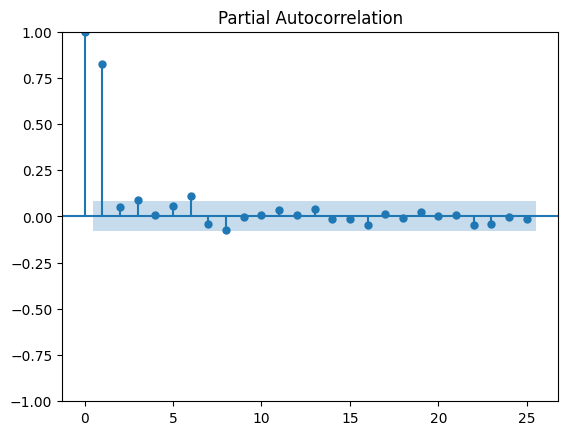

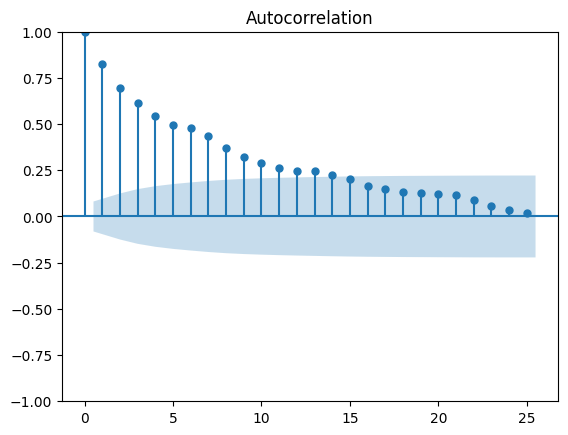

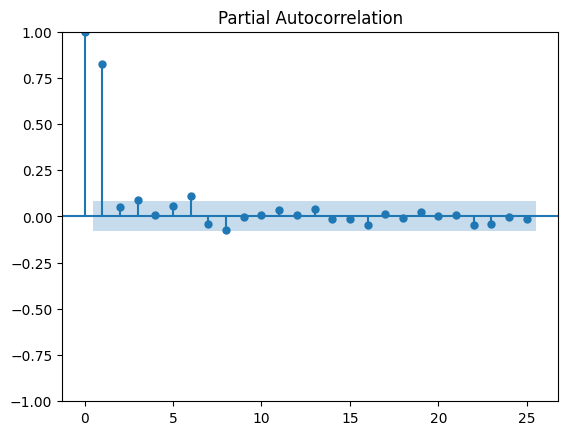

In [59]:
# Visualize autocorrelation using plot_acf
plot_acf(LUZ_GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LUZ_GWAP_train, lags=25, alpha=0.05)

In [62]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 13
#Auto-Arima: Identification of best orders using AIC
LUZ_GWAP_sarimax = auto_arima(LUZ_GWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=13, 
                            seasonal=False,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=LUZ_diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1019.602, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1028.298, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1033.009, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1021.597, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1065.384, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1064.312, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1048.248, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1067.240, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1035.004, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1030.293, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1066.236, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1050.245, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.737 seconds


In [92]:
print(LUZ_GWAP_train)
print(LUZ_data_train)

Date
2022-01-01    0.278764
2022-01-02    0.337307
2022-01-03    0.443016
2022-01-04    0.525069
2022-01-05    0.808333
                ...   
2023-08-03    0.331255
2023-08-04    0.447944
2023-08-05    0.427384
2023-08-06    0.431395
2023-08-07    0.445290
Freq: D, Name: GWAP, Length: 584, dtype: float64
         GWAP      LWAP  FLOW_LUZ  RESERVE_GWAP_Fr  RESERVE_GWAP_Ru  \
0    0.699592  0.007430  0.279279         0.379310         0.348315   
1    0.699592  0.051217  0.342342         0.318966         0.224719   
2    0.699313  0.278965  0.378378         0.439655         0.348315   
3    0.698963  0.373526  0.414414         0.474138         0.314607   
4    0.698890  0.408867  0.432432         0.500000         0.426966   
..        ...       ...       ...              ...              ...   
579  1.000000  0.654257  0.351351         0.534483         0.651685   
580  0.680691  0.729433  0.396396         0.586207         0.730337   
581  0.571970  0.709250  0.342342         0.525862    

In [103]:
luz_exog = pd.concat([LUZ_exog_train, LUZ_exog_test], axis=0)
print(luz_exog)

                FLOW_LUZ  RESERVE_GWAP_Fr  RESERVE_GWAP_Ru  RESERVE_GWAP_Rd  \
Date                                                                          
2022-01-01      0.279279         0.379310         0.348315         0.326733   
2022-01-02      0.342342         0.318966         0.224719         0.306931   
2022-01-03      0.378378         0.439655         0.348315         0.386139   
2022-01-04      0.414414         0.474138         0.314607         0.386139   
2022-01-05      0.432432         0.500000         0.426966         0.425743   
...                  ...              ...              ...              ...   
2023-12-27 -24416.540000      3698.677664      6068.115985      1208.347276   
2023-12-28 -18873.450000      3268.687856      6649.677833      3186.783962   
2023-12-29   5849.070000        75.866019      7602.698723      2349.359595   
2023-12-30  13005.470000        52.908627        87.260609         0.000064   
2023-12-31 -12328.640000         6.778533       640.

In [121]:
print(LUZ_exog_test)

            FLOW_LUZ  RESERVE_GWAP_Fr  RESERVE_GWAP_Ru  RESERVE_GWAP_Rd  \
Date                                                                      
2023-08-08   -634.11      1487.960668      3181.738826         0.000082   
2023-08-09  -3076.80      1756.467906      2290.057382         0.000102   
2023-08-10 -30344.56      2955.255204      5026.898520         0.000086   
2023-08-11 -29323.08      2444.164721      3005.440897         0.000109   
2023-08-12 -46005.71      1883.738436      1842.556046         0.000011   
...              ...              ...              ...              ...   
2023-12-27 -24416.54      3698.677664      6068.115985      1208.347276   
2023-12-28 -18873.45      3268.687856      6649.677833      3186.783962   
2023-12-29   5849.07        75.866019      7602.698723      2349.359595   
2023-12-30  13005.47        52.908627        87.260609         0.000064   
2023-12-31 -12328.64         6.778533       640.291309         1.317087   

            RESERVE_GWAP

In [116]:
LUZ_GWAP_forecaster = sm.tsa.SARIMAX(endog=LUZ_GWAP_train, exog= LUZ_exog_train, order=(1,1,1))
fit_luz_gwap = LUZ_GWAP_forecaster.fit(disp=False)

# Forecasting
luz_gwap_forecast = fit_luz_gwap.forecast(steps=len(LUZ_GWAP_test), iter=1000)

# Calculate MSE
mse = mean_squared_error(LUZ_GWAP_test, luz_gwap_forecast)
print(f"Mean Squared Error (MAE): {mse}")  

print(luz_gwap_forecast)

Mean Squared Error (MAE): 36751532.644298114
Date
2023-08-08    7953.672194
2023-08-09    7116.523973
2023-08-10    9804.539158
2023-08-11    8101.978364
2023-08-12    6522.459813
                 ...     
2023-12-27    3991.018676
2023-12-28    3688.349524
2023-12-29    3674.409234
2023-12-30    3304.265247
2023-12-31    3491.397388
Freq: D, Name: GWAP, Length: 146, dtype: float64
2023-08-08    0.449934
2023-08-09    0.453611
2023-08-10    0.456522
2023-08-11    0.458827
2023-08-12    0.460653
                ...   
2023-12-27    0.467595
2023-12-28    0.467595
2023-12-29    0.467595
2023-12-30    0.467595
2023-12-31    0.467595
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['iter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



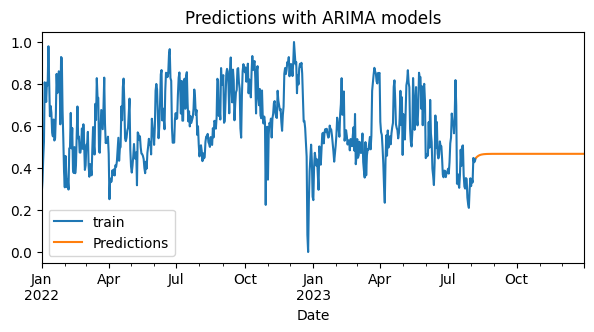

In [119]:
#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
LUZ_GWAP_train.plot(ax=ax, label='train')
luz_gwap_forecast.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()

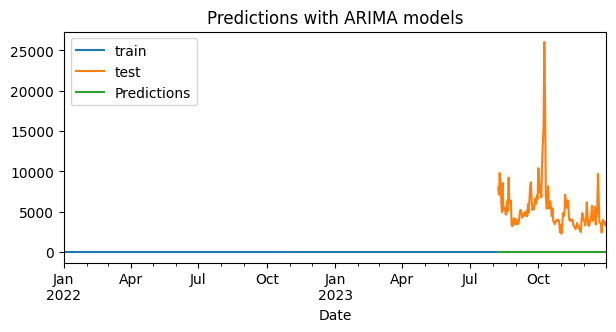

In [118]:
#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
LUZ_GWAP_train.plot(ax=ax, label='train')
LUZ_GWAP_test.plot(ax=ax, label='test')
luz_gwap_forecast.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()

NameError: name 'predictions111' is not defined

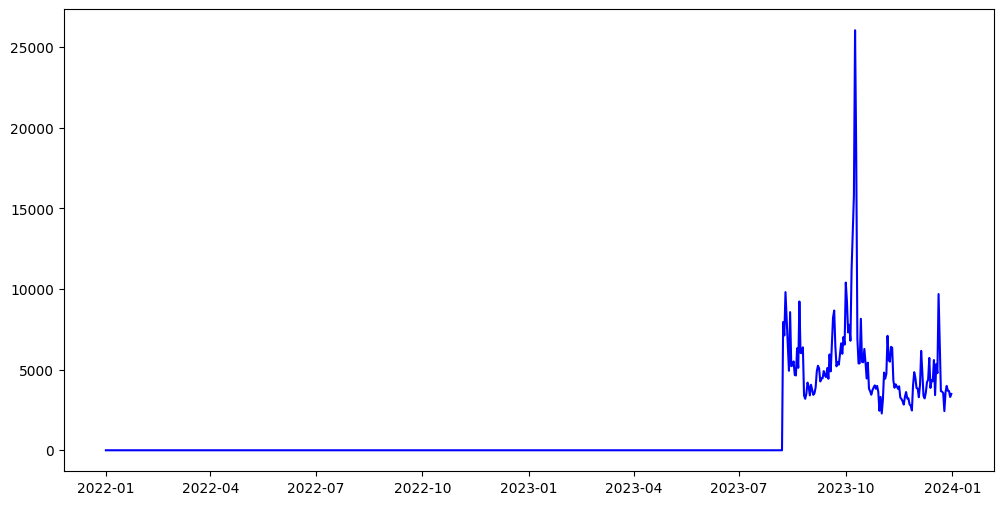

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(LUZ_GWAP, label='Original Data', color='blue')
plt.plot(predictions111, label='Predictions', color='red', linestyle='--')
plt.title('Predictions vs Original Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [153]:
forecaster102 = ForecasterSarimax(LUZ_GWAP_sarimax)
metric102, predictions102 = backtesting_sarimax(
                          forecaster            = forecaster102,
                          y                     = LUZ_GWAP,
                          initial_train_size    = len(LUZ_GWAP_train),
                          fixed_train_size      = True,
                          steps=292,
                          metric                = 'mean_absolute_error',
                          refit                 = False,
                          n_jobs                = "auto",
                          suppress_warnings_fit = True,
                          verbose               = True,
                          show_progress         = True
                      )
display(metric102)
predictions.head(4)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 438
Number of observations used for backtesting: 292
    Number of folds: 1
    Number skipped folds: 0 
    Number of steps per fold: 292
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2022-01-01 00:00:00 -- 2023-03-14 00:00:00  (n=438)
    Validation: 2023-03-15 00:00:00 -- 2023-12-31 00:00:00  (n=292)



100%|██████████| 1/1 [00:00<00:00, 79.54it/s]


,mean_absolute_error
0,0.168742


,pred
2023-03-15,0.484258
2023-03-16,0.478540
2023-03-17,0.489471
2023-03-18,0.513321


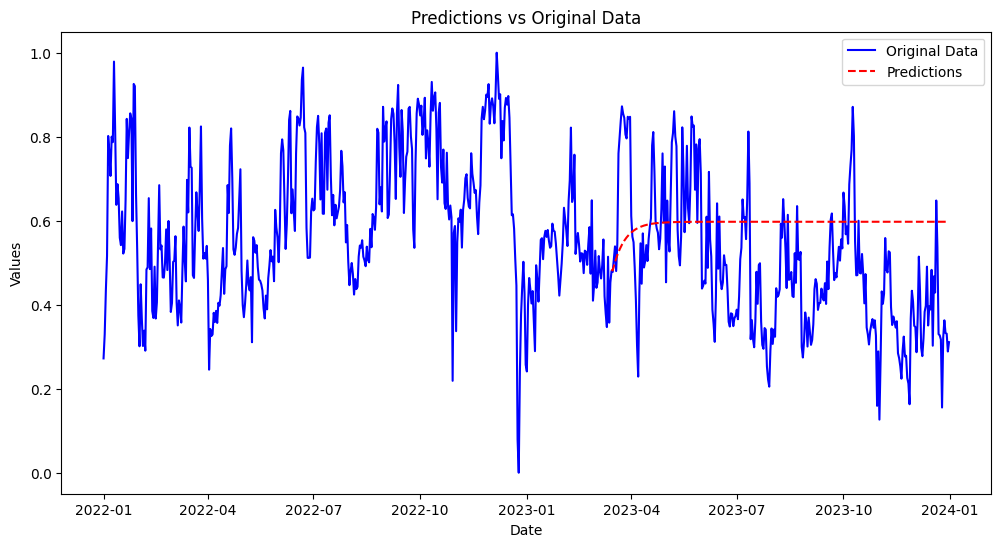

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(LUZ_GWAP, label='Original Data', color='blue')
plt.plot(predictions102, label='Predictions', color='red', linestyle='--')
plt.title('Predictions vs Original Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [72]:
def fit_sarimax(data, model, data_test):
    
    # ARIMA model with ForecasterSarimax and skforecast Sarimax
    # ==============================================================================
    forecaster = sm.tsa.SARIMAX()
    forecaster.fit(y=data, suppress_warnings=True)

    # Prediction
    predictions = forecaster.forecast(steps=len(data_test))
    
    # Calculate MSE
    mae = mean_absolute_error(data_test, predictions)
    print(f"Mean Absolute Error (MAE): {mae}")

    
    # Plot predictions
    # ==============================================================================
    fig, ax = plt.subplots(figsize=(7, 3))
    data.plot(ax=ax, label='train')
    data_test.plot(ax=ax, label='test')
    predictions.plot(ax=ax, label='Predictions')
    ax.set_title('Predictions with ARIMA models')
    ax.legend()

    return predictions, mae


In [74]:
fit_sarimax(LUZ_GWAP_train,LUZ_GWAP_sarimax,LUZ_data_test)

TypeError: SARIMAX.__init__() missing 1 required positional argument: 'endog'

Mean Absolute Error (MAE): 0.13687666407476454


(2023-03-15    0.467035
 2023-03-16    0.478495
 2023-03-17    0.487537
 2023-03-18    0.494672
 2023-03-19    0.500301
                 ...   
 2023-12-27    0.521353
 2023-12-28    0.521353
 2023-12-29    0.521353
 2023-12-30    0.521353
 2023-12-31    0.521353
 Freq: D, Name: pred, Length: 292, dtype: float64,
 0.13687666407476454)

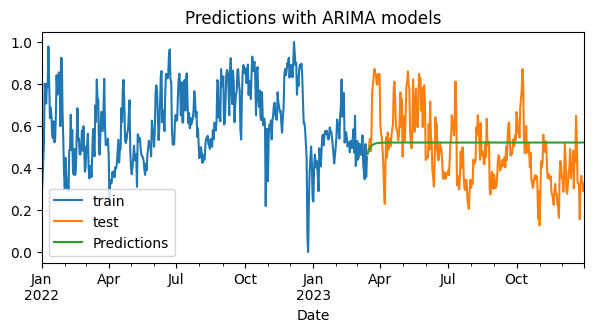

In [161]:
fit_sarimax(LUZ_GWAP_train,LUZ_GWAP_sarimax_diff,LUZ_GWAP_test2)

In [166]:
#experiment 2
def fit_sarimax2(data_train, model, data_test):
    # Initialize the SARIMAX forecaster
    forecaster = ForecasterSarimax(regressor=model)
    
    # Fit the forecaster to the training data
    forecaster.fit(y=data_train, suppress_warnings=True)

    # Prediction on the training set
    predictions_train = forecaster.forecast(steps=len(data_train))
    
    # Calculate MAE for the training set
    mae_train = mean_absolute_error(data_train, predictions_train)
    print(f"Mean Absolute Error (MAE) on Training Set: {mae_train}")

    # Prediction on the test set
    predictions_test = forecaster.forecast(steps=len(data_test))
    
    # Calculate MAE for the test set
    mae_test = mean_absolute_error(data_test, predictions_test)
    print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

    # Plot predictions
    fig, ax = plt.subplots(figsize=(10, 5))
    data_train.plot(ax=ax, label='Training Data')
    data_test.plot(ax=ax, label='Test Data')
    predictions_train.plot(ax=ax, label='Predictions on Training Set')
    predictions_test.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
    ax.set_title('SARIMAX Predictions')
    ax.legend()
    plt.show()

    return predictions_train, mae_train, predictions_test, mae_test

In [167]:
fit_sarimax2(LUZ_GWAP_train,LUZ_GWAP_sarimax,LUZ_GWAP_train)

AttributeError: 'ForecasterSarimax' object has no attribute 'forecast'

In [150]:
LUZ_GWAP_test2 = pd.concat([LUZ_GWAP_val, LUZ_GWAP_test], ignore_index=False)
print(LUZ_GWAP_test2)


Date
2023-03-15    0.480256
2023-03-16    0.477933
2023-03-17    0.507448
2023-03-18    0.538917
2023-03-19    0.480170
                ...   
2023-12-27    0.362859
2023-12-28    0.332509
2023-12-29    0.331029
2023-12-30    0.288643
2023-12-31    0.310847
Freq: D, Name: GWAP, Length: 292, dtype: float64
